<a href="https://colab.research.google.com/github/HrishikeshRana/goldpricepredictor/blob/main/Gold_price_pridictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Colllection and Processing

In [16]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [17]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [19]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [20]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<ipython-input-25-abd4ca3557d3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = gold_data.corr()


Text(0.5, 1.05, 'Correlation of gold data  Features')

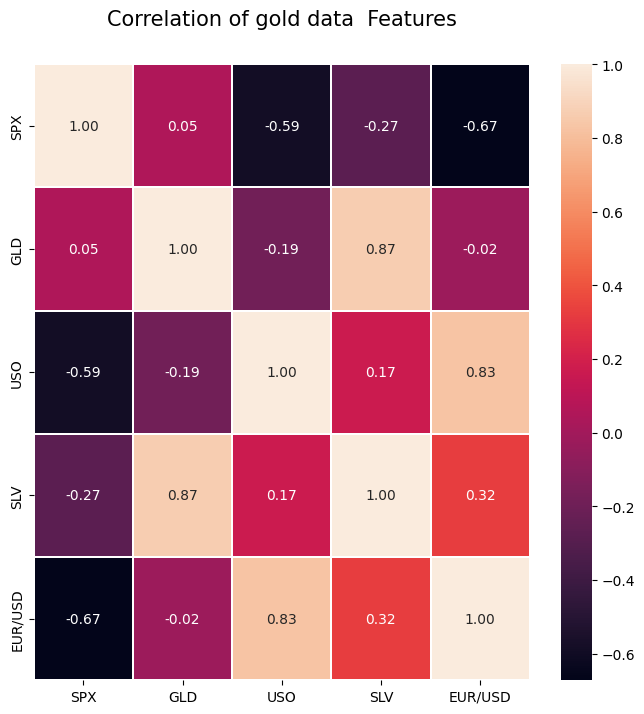

In [25]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
corr = gold_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of gold data  Features', y = 1.05, size=15)

In [26]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



<ipython-input-27-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

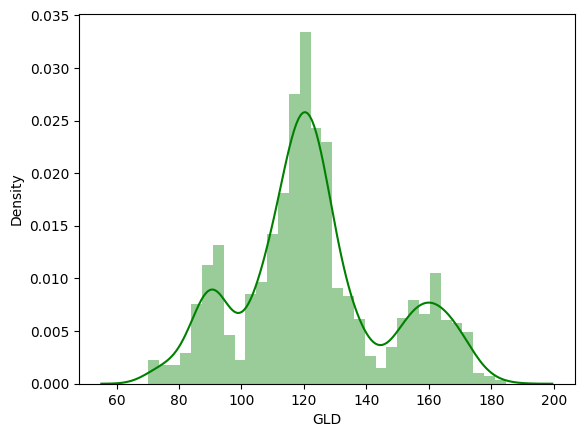

In [27]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

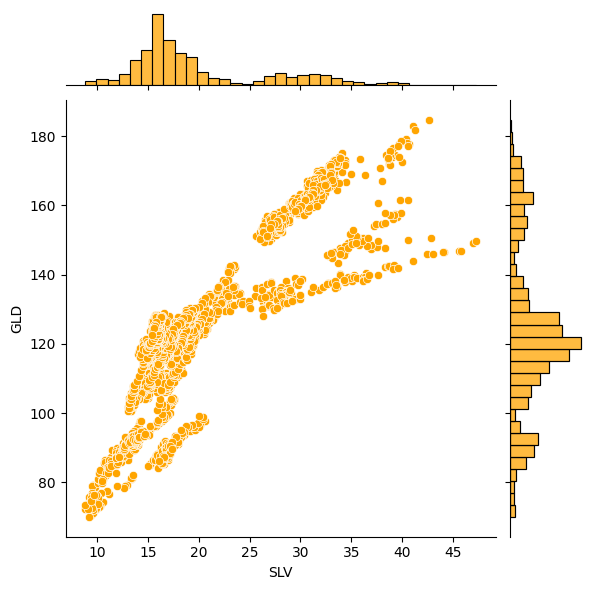

In [41]:
#Now we check the relation with GLD variable
sns.jointplot(x = gold_data['SLV'], y = gold_data['GLD'], color = 'orange')

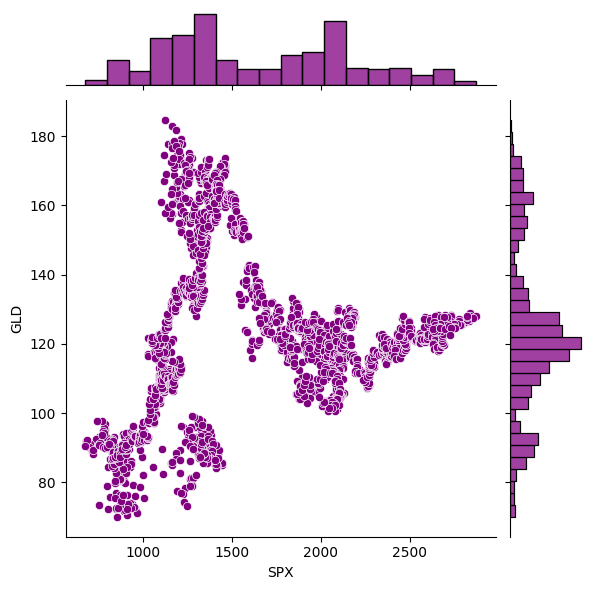

In [39]:
#Now we check the relation with GLD variable
sns.jointplot(x = gold_data['SPX'], y = gold_data['GLD'], color = 'purple')

In [28]:
# spliting the feature and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X,'\n')
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
#spliting into training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [30]:
#model training: Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [32]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.79199925  81.88099997 115.88850028 127.71930105 120.8410011
 154.91439753 150.21479901 126.0809004  117.52089866 126.04480078
 116.63620102 171.79630111 141.55679874 168.02029799 115.24770002
 117.80780085 139.59960252 170.21890096 159.78490286 159.06029959
 155.14640022 125.58850016 176.16720026 156.94310334 125.2396004
  93.75119983  76.70420014 120.49959997 119.0610992  167.52619948
  88.18770047 125.33659982  91.11210071 117.64130071 121.18279896
 136.52810094 115.36540127 114.97280102 148.90009983 106.92290139
 104.55180249  87.16439767 126.40770047 117.81409983 153.99139894
 119.65780023 108.42559988 108.14869837  93.20110041 127.09999799
  75.1896001  113.6384994  121.2489999  111.22799903 118.94439896
 120.69189962 158.86620064 167.33840131 147.04279693  85.73729892
  94.33600033  86.7931989   90.45620029 118.84060086 126.38300046
 127.57100001 169.02489997 122.37619935 117.52339873  98.41240019
 168.90640217 143.75119756 131.92460243 121.24730213 121.91699951
 119.7626006

In [34]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890618283397862


**Compare the Actual Values and Predicted Values in a Plot**

In [35]:
Y_test = list(Y_test)

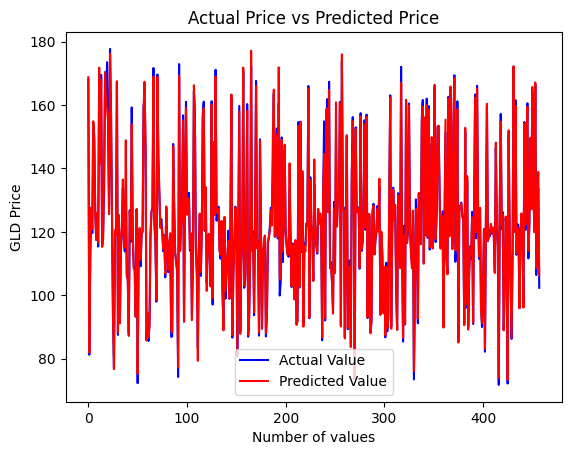

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()